# Flujo de fotones

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl 
from scipy.interpolate import interp1d 
from astropy.io import fits

In [2]:
def trapecio_com (y,x):
    n = len(x)
    a = np.min(x)
    b = np.max(x)
    h = (b-a)/n
    s_1 = []
    for i in range(int(n)-1):
        s_1.append(y[i])
    return (h/2)*(y[0]+y[n-1] + 2*np.sum(s_1))

In [3]:
def simpson_com(y,x):
    n = len(x)
    a = np.min(x)
    b = np.max(x)
    h = (b-a)/n
    s_1 = []
    for i in range((int(n/2))-1):
        s_1.append(y[2*i])
    s_2 = []
    for i in range((int(n/2))):
        s_2.append(y[2*i-1])
    return (h/3)*(y[0]+y[n-1] + 2*np.sum(s_1) + 4*np.sum(s_2))  

In [13]:
theta = np.loadtxt('theta.txt')
data_psf = np.loadtxt('psf_theta.txt')
datos = np.loadtxt('events.txt').T

In [14]:
psf = []
for i in range(len(data_psf)):
    psf.append(interp1d(theta*math.pi/180,data_psf[i]))

In [69]:
a = 0
b = 0.2*math.pi/180.0
n = 100000
x = np.linspace(a,b,n)

psf_inte_simp = []
for i in range(len(psf)):
    psf_inte_simp.append(2*math.pi*simpson_com(psf[i](x),x))

flux_simp = np.divide(datos[0],datos[2]-datos[1])*np.divide(1,datos[3])*np.divide(1,psf_inte_simp)

psf_inte_trap = []
for i in range(len(psf)):
    psf_inte_trap.append(2*math.pi*simpson_com(psf[i](x),x))

flux_trap = np.divide(datos[0],datos[2]-datos[1])*np.divide(1,datos[3])*np.divide(1,psf_inte_trap)

psf_inte_py = []
for i in range(len(psf)):
    psf_inte_py.append(2*math.pi*np.trapz(psf[i](x),x))

flux_py = np.divide(datos[0],datos[2]-datos[1])*np.divide(1,datos[3])*np.divide(1,psf_inte_py)

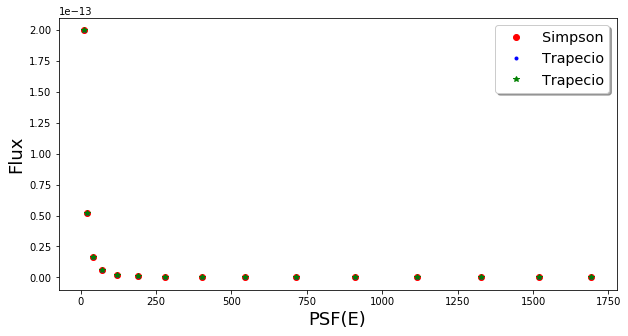

In [74]:
plt.figure(figsize=(10,5))
plt.plot(psf_inte_simp,flux_simp,'ro', label='Simpson')
plt.plot(psf_inte_trap,flux_trap,'b.', label='Trapecio')
plt.plot(psf_inte_py,flux_py,'g*', label='Trapecio')
plt.xlabel('PSF(E)',fontsize=18)
plt.ylabel('Flux',fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')